In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras import activations
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 '1Notmnist dataset - Copy.ipynb',
 '1Notmnist dataset.ipynb',
 '2156_3632_compressed_notMNIST_small.tar.gz.zip',
 'Checkpoint resnet50small',
 'Implementaion of vgg16-Small.ipynb',
 'Implementaion of vgg16.ipynb',
 'logs',
 'mymodel',
 'mymodel1overfit',
 'mymodelsmall',
 'mymodelsmallwz',
 'Not emnist.ipynb',
 'notMNIST_large',
 'notMNIST_large.tar.gz',
 'notMNIST_small',
 'OPENCV OK .ipynb',
 'OPENCV OK Real.ipynb',
 'resnet50 check points',
 'Resnet50 for notemnist.ipynb',
 'Resnet50 for notemnistisit-Copy1.ipynb',
 'Resnet50 for notemnistisit-SMALL.ipynb',
 'Resnet50 for notemnistisit.ipynb',
 'synthetic',
 'unicode',
 'Untitled.ipynb',
 'VGG16small check points']

In [4]:
classes = os.listdir(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\notMNIST_large')

In [5]:
classes

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [6]:
image_gen = ImageDataGenerator(validation_split = 0.3, rescale=1.0/255.0, zoom_range = [0.5,2])

In [7]:
train_gen = image_gen.flow_from_directory(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\notMNIST_large',
                                          target_size = (28,28),
                                          classes = classes,
                                          subset = 'training',
                                          batch_size = 32,
                                          shuffle = True
                                         )

Found 370385 images belonging to 10 classes.


In [8]:
test_gen = image_gen.flow_from_directory(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\notMNIST_large',
                                         target_size = (28,28),
                                         classes = classes,
                                         subset = 'validation',
                                         batch_size = 32,
                                         shuffle = True
                                         )

Found 158729 images belonging to 10 classes.


In [18]:
train_steps = (train_gen.samples//32)
test_steps = (test_gen.samples // 32)

In [10]:
 os.chdir(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST')

In [14]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(256,kernel_size = (3,3), input_shape = (28,28,3), padding = 'valid',activation='relu'))
model.add(Conv2D(128,kernel_size = (3,3), padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size = (3,3), padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       295040    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [16]:
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

Epoch 1/1000
11574/11574 [==============================] - 305s 26ms/step - loss: 0.4374 - accuracy: 0.8720 - val_loss: 0.3799 - val_accuracy: 0.8914 - lr: 0.0010
Epoch 2/1000
11574/11574 [==============================] - 303s 26ms/step - loss: 0.4174 - accuracy: 0.8785 - val_loss: 0.3663 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 3/1000
11574/11574 [==============================] - 305s 26ms/step - loss: 0.4081 - accuracy: 0.8810 - val_loss: 0.3608 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 4/1000
11574/11574 [==============================] - 308s 27ms/step - loss: 0.4018 - accuracy: 0.8824 - val_loss: 0.3659 - val_accuracy: 0.8945 - lr: 0.0010
Epoch 5/1000
11574/11574 [==============================] - 305s 26ms/step - loss: 0.3981 - accuracy: 0.8833 - val_loss: 0.3571 - val_accuracy: 0.8976 - lr: 0.0010
Epoch 6/1000
11574/11574 [==============================] - 305s 26ms/step - loss: 0.3940 - accuracy: 0.8845 - val_loss: 0.3580 - val_accuracy: 0.8981 - lr: 0.0010
Epoch 7/1000
115

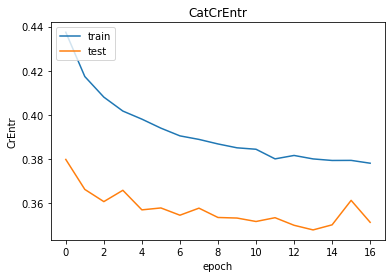

In [19]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=3,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=3, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
model.save(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\first_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\offic\Documents\GitStuff\NOTEMNIST\first_model\assets


In [43]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(256,kernel_size = (3,3), input_shape = (28,28,3), padding = 'same',activation='relu'))
model.add(Conv2D(128,kernel_size = (3,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size = (3,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [44]:
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

In [45]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=3,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=3, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['CategoricalCrossentropy'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1000
13227/13227 [==============================] - 198s 15ms/step - loss: 0.4391 - accuracy: 0.8816 - val_loss: 0.3240 - val_accuracy: 0.9111 - lr: 0.0010
Epoch 2/1000
13227/13227 [==============================] - 200s 15ms/step - loss: 0.3594 - accuracy: 0.8979 - val_loss: 0.3210 - val_accuracy: 0.9131 - lr: 0.0010
Epoch 3/1000
13227/13227 [==============================] - 196s 15ms/step - loss: 0.3397 - accuracy: 0.9033 - val_loss: 0.3116 - val_accuracy: 0.9140 - lr: 0.0010
Epoch 4/1000
13227/13227 [==============================] - 196s 15ms/step - loss: 0.3280 - accuracy: 0.9064 - val_loss: 0.3019 - val_accuracy: 0.9169 - lr: 0.0010
Epoch 5/1000
13227/13227 [==============================] - 196s 15ms/step - loss: 0.3198 - accuracy: 0.9082 - val_loss: 0.3134 - val_accuracy: 0.9165 - lr: 0.0010
Epoch 6/1000
13227/13227 [==============================] - 195s 15ms/step - loss: 0.3156 - accuracy: 0.9098 - val_loss: 0.3060 - val_accuracy: 0.9160 - lr: 0.0010
Epoch 7/1000
132

KeyError: 'CategoricalCrossentropy'

In [47]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(64,kernel_size = (3,3), input_shape = (28,28,3), padding = 'same',activation='relu'))
model.add(Conv2D(128,kernel_size = (3,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,kernel_size = (3,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

In [49]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=5,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=3, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1000
13227/13227 [==============================] - 298s 23ms/step - loss: 0.2728 - accuracy: 0.9219 - val_loss: 0.2772 - val_accuracy: 0.9237 - lr: 1.0000e-04
Epoch 2/1000
13227/13227 [==============================] - 168s 13ms/step - loss: 0.2552 - accuracy: 0.9265 - val_loss: 0.2772 - val_accuracy: 0.9244 - lr: 1.0000e-04
Epoch 3/1000
13227/13227 [==============================] - 151s 11ms/step - loss: 0.2436 - accuracy: 0.9298 - val_loss: 0.2770 - val_accuracy: 0.9243 - lr: 1.0000e-04
Epoch 4/1000
13227/13227 [==============================] - 151s 11ms/step - loss: 0.2336 - accuracy: 0.9325 - val_loss: 0.2779 - val_accuracy: 0.9247 - lr: 1.0000e-04
Epoch 5/1000
13227/13227 [==============================] - 151s 11ms/step - loss: 0.2242 - accuracy: 0.9352 - val_loss: 0.2842 - val_accuracy: 0.9247 - lr: 1.0000e-04
Epoch 6/1000
13227/13227 [==============================] - 151s 11ms/step - loss: 0.2151 - accuracy: 0.9378 - val_loss: 0.2862 - val_accuracy: 0.9241 - lr: 1.0

KeyError: 'CategoricalCrossentropy'

In [51]:
model.save(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\mymodel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\offic\Documents\GitStuff\NOTEMNIST\mymodel\assets


In [5]:
keras.backend.clear_session()
model = Sequential()
tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation="bilinear")
tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation="bilinear")
tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation="bilinear")
tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation="bilinear")
model.add(Conv2D(64,kernel_size = (3,3), input_shape = (28,28,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size = (3,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size = (3,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [18]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=5,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=3, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1000
26455/26455 [==============================] - 574s 22ms/step - loss: 0.4503 - accuracy: 0.8752 - val_loss: 0.3452 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 2/1000
26455/26455 [==============================] - 153s 6ms/step - loss: 0.3759 - accuracy: 0.8900 - val_loss: 0.3514 - val_accuracy: 0.8998 - lr: 0.0010
Epoch 3/1000
26455/26455 [==============================] - 153s 6ms/step - loss: 0.3739 - accuracy: 0.8900 - val_loss: 0.3364 - val_accuracy: 0.9042 - lr: 0.0010
Epoch 4/1000
26455/26455 [==============================] - 155s 6ms/step - loss: 0.3729 - accuracy: 0.8901 - val_loss: 0.3333 - val_accuracy: 0.9051 - lr: 0.0010
Epoch 5/1000
26455/26455 [==============================] - 153s 6ms/step - loss: 0.3650 - accuracy: 0.8924 - val_loss: 0.3337 - val_accuracy: 0.9044 - lr: 0.0010
Epoch 6/1000
26455/26455 [==============================] - 154s 6ms/step - loss: 0.3641 - accuracy: 0.8930 - val_loss: 0.3726 - val_accuracy: 0.8934 - lr: 0.0010
Epoch 7/1000
26455/26

KeyboardInterrupt: 

In [28]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(256,kernel_size = (8,8), input_shape = (28,28,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

Epoch 1/1000
26455/26455 [==============================] - 541s 20ms/step - loss: 0.3298 - accuracy: 0.8999 - val_loss: 0.2673 - val_accuracy: 0.9201 - lr: 0.0010
Epoch 2/1000
26455/26455 [==============================] - 637s 24ms/step - loss: 0.2641 - accuracy: 0.9187 - val_loss: 0.2487 - val_accuracy: 0.9249 - lr: 0.0010
Epoch 3/1000
26455/26455 [==============================] - 510s 19ms/step - loss: 0.2456 - accuracy: 0.9242 - val_loss: 0.2607 - val_accuracy: 0.9272 - lr: 0.0010
Epoch 4/1000
26455/26455 [==============================] - 510s 19ms/step - loss: 0.2350 - accuracy: 0.9276 - val_loss: 0.2582 - val_accuracy: 0.9281 - lr: 0.0010
Epoch 5/1000
26455/26455 [==============================] - 510s 19ms/step - loss: 0.2291 - accuracy: 0.9292 - val_loss: 0.3055 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 6/1000
26455/26455 [==============================] - 503s 19ms/step - loss: 0.1791 - accuracy: 0.9411 - val_loss: 0.2387 - val_accuracy: 0.9347 - lr: 1.0000e-04
Epoch 7/1000

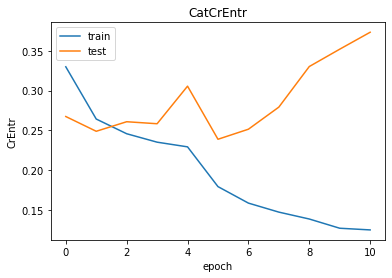

In [29]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=5,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=3, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# making smaller

In [19]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(16,kernel_size = (2,2), input_shape = (28,28,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(12,kernel_size = (4,4), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(8,kernel_size = (4,4), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(4,kernel_size = (2,2), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=5,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=2, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1000
23149/23149 [==============================] - 824s 36ms/step - loss: 1.0557 - accuracy: 0.6902 - val_loss: 0.8172 - val_accuracy: 0.7735 - lr: 0.0010
Epoch 2/1000
23149/23149 [==============================] - 317s 14ms/step - loss: 0.8499 - accuracy: 0.7616 - val_loss: 0.7674 - val_accuracy: 0.7843 - lr: 0.0010
Epoch 3/1000
23149/23149 [==============================] - 318s 14ms/step - loss: 0.8067 - accuracy: 0.7719 - val_loss: 0.7093 - val_accuracy: 0.8009 - lr: 0.0010
Epoch 4/1000
23149/23149 [==============================] - 319s 14ms/step - loss: 0.7828 - accuracy: 0.7783 - val_loss: 0.6862 - val_accuracy: 0.8080 - lr: 0.0010
Epoch 5/1000
23149/23149 [==============================] - 318s 14ms/step - loss: 0.7651 - accuracy: 0.7834 - val_loss: 0.6798 - val_accuracy: 0.8094 - lr: 0.0010
Epoch 6/1000
23149/23149 [==============================] - 316s 14ms/step - loss: 0.7471 - accuracy: 0.7876 - val_loss: 0.6893 - val_accuracy: 0.8066 - lr: 0.0010
Epoch 7/1000
231

In [42]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(128,kernel_size = (8,8), input_shape = (28,28,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation="bilinear"))
model.add(Conv2D(256,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

In [43]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=5,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=2, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%d%m-%H%M")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/1000
23149/23149 [==============================] - 922s 40ms/step - loss: 0.3667 - accuracy: 0.8904 - val_loss: 0.3032 - val_accuracy: 0.9152 - lr: 0.0010
Epoch 2/1000
23149/23149 [==============================] - 940s 41ms/step - loss: 0.2912 - accuracy: 0.9132 - val_loss: 0.2704 - val_accuracy: 0.9212 - lr: 0.0010
Epoch 3/1000
23149/23149 [==============================] - 856s 37ms/step - loss: 0.2743 - accuracy: 0.9188 - val_loss: 0.2892 - val_accuracy: 0.9178 - lr: 0.0010
Epoch 4/1000
23149/23149 [==============================] - 861s 37ms/step - loss: 0.2658 - accuracy: 0.9219 - val_loss: 0.2933 - val_accuracy: 0.9176 - lr: 0.0010
Epoch 5/1000
23149/23149 [==============================] - 865s 37ms/step - loss: 0.2004 - accuracy: 0.9360 - val_loss: 0.2402 - val_accuracy: 0.9325 - lr: 1.0000e-04
Epoch 6/1000
23149/23149 [==============================] - 921s 40ms/step - loss: 0.1789 - accuracy: 0.9413 - val_loss: 0.2678 - val_accuracy: 0.9329 - lr: 1.0000e-04
Epoch 7/

KeyboardInterrupt: 

In [46]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(256,kernel_size = (3,3), input_shape = (28,28,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,kernel_size = (3,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

Epoch 1/1000
23149/23149 [==============================] - 791s 34ms/step - loss: 0.3082 - accuracy: 0.9049 - val_loss: 0.2541 - val_accuracy: 0.9255 - lr: 0.0010
Epoch 2/1000
23149/23149 [==============================] - 772s 33ms/step - loss: 0.2335 - accuracy: 0.9271 - val_loss: 0.2381 - val_accuracy: 0.9295 - lr: 0.0010
Epoch 3/1000
23149/23149 [==============================] - 722s 31ms/step - loss: 0.2072 - accuracy: 0.9347 - val_loss: 0.2465 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 4/1000
23149/23149 [==============================] - 733s 32ms/step - loss: 0.1890 - accuracy: 0.9403 - val_loss: 0.2672 - val_accuracy: 0.9294 - lr: 0.0010
Epoch 5/1000
23149/23149 [==============================] - 761s 33ms/step - loss: 0.1286 - accuracy: 0.9575 - val_loss: 0.2690 - val_accuracy: 0.9358 - lr: 1.0000e-04
Epoch 6/1000
23149/23149 [==============================] - 782s 34ms/step - loss: 0.1031 - accuracy: 0.9658 - val_loss: 0.2934 - val_accuracy: 0.9363 - lr: 1.0000e-04
Epoch 7/

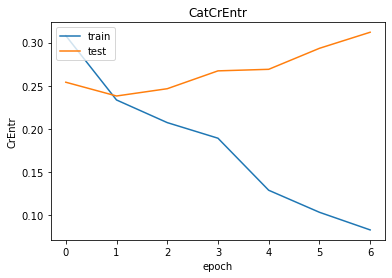

In [47]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=5,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=2, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%d%m-%H%M")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\mymodel1')

# NotEmnistSmall

In [5]:
classes = os.listdir(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\notMNIST_small\notMNIST_small')

In [6]:
for i in classes:
    imgs = os.listdir(os.path.join(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\notMNIST_small\notMNIST_small', i))
    for j in imgs:
        try:
            a = Image.open(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\notMNIST_small\notMNIST_small'+'\\' + i + '\\' + j)
        except:
            a == 'UnidentifiedImageError'
            os.remove(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\notMNIST_small\notMNIST_small'+'\\' + i + '\\' + j)

In [7]:
image_gen = ImageDataGenerator(validation_split = 0.1, rescale=1.0/255.0, zoom_range = [0.5,1.5])

In [8]:
train_gen = image_gen.flow_from_directory(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\notMNIST_small\notMNIST_small',
                                          target_size = (28,28),
                                          classes = classes,
                                          subset = 'training',
                                          batch_size = 16,
                                          shuffle = True
                                         )
test_gen = image_gen.flow_from_directory(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\notMNIST_small\notMNIST_small',
                                         target_size = (28,28),
                                         classes = classes,
                                         subset = 'validation',
                                         batch_size = 16,
                                         shuffle = True
                                         )

Found 16854 images belonging to 10 classes.
Found 1870 images belonging to 10 classes.


In [9]:
train_steps = (train_gen.samples//16)
test_steps = (test_gen.samples//16)

In [23]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(256,kernel_size = (3,3), input_shape = (28,28,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,kernel_size = (3,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,kernel_size = (8,8), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

Epoch 1/1000
936/936 [==============================] - 29s 31ms/step - loss: 0.3438 - accuracy: 0.8942 - val_loss: 0.1805 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 2/1000
936/936 [==============================] - 28s 30ms/step - loss: 0.1732 - accuracy: 0.9464 - val_loss: 0.1824 - val_accuracy: 0.9528 - lr: 0.0010
Epoch 3/1000
936/936 [==============================] - 28s 30ms/step - loss: 0.1133 - accuracy: 0.9623 - val_loss: 0.1650 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 4/1000
936/936 [==============================] - 28s 30ms/step - loss: 0.0851 - accuracy: 0.9723 - val_loss: 0.2436 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 5/1000
936/936 [==============================] - 28s 30ms/step - loss: 0.0598 - accuracy: 0.9806 - val_loss: 0.1688 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 6/1000
936/936 [==============================] - 28s 30ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.1626 - val_accuracy: 0.9651 - lr: 1.0000e-04
Epoch 7/1000
936/936 [====================

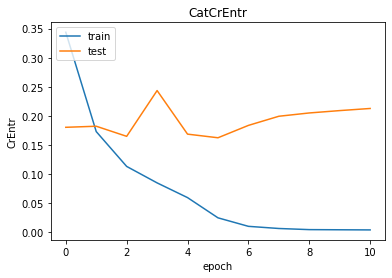

In [24]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=5,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=2, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%d%m-%H%M")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(12,kernel_size = (2,2), input_shape = (28,28,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(8,kernel_size = (4,4), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(4,kernel_size = (4,4), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(2,kernel_size = (4,4), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam',loss = 'CategoricalCrossentropy',  metrics = ['accuracy'])

Epoch 1/1000
936/936 [==============================] - 13s 14ms/step - loss: 1.8236 - accuracy: 0.3123 - val_loss: 1.5982 - val_accuracy: 0.4067 - lr: 0.0010
Epoch 2/1000
936/936 [==============================] - 11s 12ms/step - loss: 1.5466 - accuracy: 0.4180 - val_loss: 1.4286 - val_accuracy: 0.4635 - lr: 0.0010
Epoch 3/1000
936/936 [==============================] - 11s 12ms/step - loss: 1.4433 - accuracy: 0.4510 - val_loss: 1.3590 - val_accuracy: 0.4941 - lr: 0.0010
Epoch 4/1000
936/936 [==============================] - 11s 12ms/step - loss: 1.3843 - accuracy: 0.4720 - val_loss: 1.2996 - val_accuracy: 0.5204 - lr: 0.0010
Epoch 5/1000
936/936 [==============================] - 11s 12ms/step - loss: 1.3204 - accuracy: 0.5196 - val_loss: 1.2386 - val_accuracy: 0.5842 - lr: 0.0010
Epoch 6/1000
936/936 [==============================] - 11s 12ms/step - loss: 1.2576 - accuracy: 0.5841 - val_loss: 1.1938 - val_accuracy: 0.6234 - lr: 0.0010
Epoch 7/1000
936/936 [========================

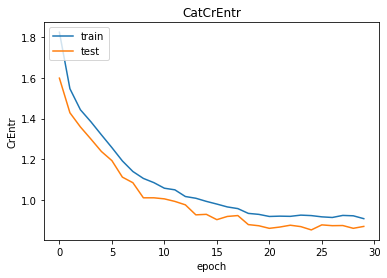

In [9]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode = 'auto', 
                                      patience=5,
                                      restore_best_weights=True, 
                                     )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              patience=2, min_lr=0.00001)

log_dir = r"C:\Users\offic\Documents\GitStuff\NOTEMNIST\logs\fit" + datetime.datetime.now().strftime("%d%m-%H%M")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(train_gen,
                    steps_per_epoch = train_steps,
                    epochs=1000, 
                    callbacks=[es, reduce_lr, tensorboard_callback],
                    validation_data = test_gen,
                    validation_steps = test_steps
                   )

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CatCrEntr')
plt.ylabel('CrEntr')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model.save(r'C:\Users\offic\Documents\GitStuff\NOTEMNIST\mymodelsmallwz')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\offic\Documents\GitStuff\NOTEMNIST\mymodelsmallwz\assets
